# Studi Kasus: Faktor-Faktor yang Mempengaruhi Harga Penjualan Mobil <a id='intro'></a>

Sebuah perusahaan penjualan mobil bernama `Crankshaft List` ingin mengetahui faktor apa yang mempengaruhi harga jual mobil. Ratusan iklan kendaraan gratis ditayangkan di situs web perusahaan setiap hari. Kita perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

Analisis faktor harga Jual mobil dipengaruhi oleh beberapa faktor, beberapa faktor diantaranya `model_year`, `model`, `condition`, `cylinders`, `fuel`, `odometer`, `transmission`, `type`, `paint_color`, `is_4wd`. Apakah benar faktor-faktor yang disebutkan mempengaruhi harga jual `price` mobil?.

Beberapa hipotesis yang diajukan untuk mengetahui `Faktor Harga Jual Mobil` diantaranya:
- Apakah benar rata-rata harga jual mobil yang dimiliki `Crankshaft List` berkisar pada `USD 15000`?
- Apakah benar rata-rata usia mobil yang dijual `Crankshaft List` berkisar di `usia 2 Tahun`?
- Apakah benar rata-rata jarak tempuh mobil yang dijual `Crankshaft List` berkisar `200000 Miles`?
- Apakah benar waktu tayang iklan rata-rata berada pada `30 hari` hingga mobil terjual?
- Apakah benar mobil dengan tipe `truck` dan `pickup` memiliki banyak iklan?
- Apakah benar korelasi antara harga `'price'` dengan usia `'usia'` memiliki korelasi negatif yang kuat?
- Apakah benar mobil `sedan` dengan tipe transmisi `automatik` memiliki harga jual yang tinggi dibandingkan dengan tipe transmisi lain?
- Apakah benar mobil `suv` dengan tipe transmisi `manual` memiliki harga jual yang tinggi dibandingkan dengan tipe transmisi lain?
- Apakah benar mobil `sedan` dengan tipe warna `merah` memiliki harga jual yang tinggi dibandingkan dengan warna lain?
- Apakah benar mobil `suv` dengan tipe warna `orange` memiliki harga jual yang tinggi dibandingkan dengan warna lain?

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
* [Tahap 1. Pra-pemrosesan](#cont_1)
    * [1.1 Memuat Data](#cont_2)
    * [1.2 Mengeksplorasi Data Awal](#cont_3)
    * [1.3 Kesimpulan dan Langkah-Langkah Selanjutnya](#cont_4)
* [Tahap 2. Mengatasi Nilai-Nilai yang Hilang](#cont_5)
    * [2.1 Mengatasi Kolom `'model_year'`](#cont_6)
    * [2.2 Mengatasi Kolom `'cylinders'`](#cont_7)
    * [2.3 Mengatasi Kolom `'odometer'`](#cont_8) 
    * [2.4 Mengatasi Kolom `'is_4wd'`](#cont_9) 
    * [2.5 Mengatasi Kolom `'paint_color'`](#cont_10) 
    * [2.6 Mengecek Duplikat Data](#cont_11) 
* [Tahap 3. Memperbaiki Tipe Data](#cont_12)
* [Tahap 4. Memperbaiki Kualitas Data](#cont_13)
    * [4.1 Membuat Kolom Berdasarkan 'datetime'](#cont_14) 
    * [4.2 Membuat Kolom Usia Mobil](#cont_15) 
    * [4.4 Membuat Kolom Rata-rata Jarak Tempuh Kendaraan per Tahun](#cont_16)
    * [4.5 Mengubah Kolom Condition Menjadi Ordinalitas](#cont_17)
* [Tahap 5. Memeriksa Data yang Sudah Bersih](#cont_18)
* [Tahap 6. Mempelajari Parameter Inti](#cont_19)
    * [6.1 Boxplot Parameter Inti](#cont_20)
    * [6.2 Histogram Parameter Inti](#cont_21)
    * [6.3 Tabel Korelasi](#cont_22)
    * [6.4 Grafik Korelasi](#cont_23)
    * [6.5 Grafik Hexbin](#cont_24)
* [Tahap 7. Mempelajari dan Menangani Outlier](#cont_25)
* [Tahap 8. Mempelajari Parameter Inti Tanpa Outlier](#cont_26)
* [Tahap 9. Masa Berlaku Iklan](#cont_27)
    * [9.1 Rata-rata Keumuman Waktu Tayang Iklan](#cont_28)
    * [9.2 Mencari Waktu Tayang Tersingkat](#cont_29)
    * [9.3 Mencari Waktu Tayang Terlama](#cont_30)
* [Tahap 10. Harga Rata-Rata Setiap Jenis Kendaraan](#cont_31)
* [Tahap 11. Faktor Harga](#cont_32)
* [Tahap 12. Kesimpulan umum](#cont_33)

## Pra-pemrosesan <a id= 'cont_1' ></a>

Pada analisis untuk mencari `Faktor yang Mempengaruhi Harga sebuah Mobil` diperlukan beberapa library tambahan diantaranya yaitu `'Pandas'` untuk memproses data, `'Matplotlib'` dan `seaborn` untuk menampilkan grafik dari data yang sudah diproses dan `'Numpy'` untuk mengecek nilai kosong pada cell.

In [82]:
# memuat semua library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# set tema seaborn
sns.set_theme(palette='bright')

### Memuat Data <a id= 'cont_2' ></a>

Selanjutnya kita akan memuat data yang berasal dari `File CSV` yaitu `'vehicles_us.csv'`.

In [83]:
# memuat file csv menjadi DataFrame
vehicle_data = pd.read_csv('vehicles_us.csv')

### Mengeksplorasi Data Awal <a id= 'cont_3' ></a>

*Dataset* berisi kolom-kolom berikut: 

- `price` — harga sebuah mobil
- `model_year` — tahun model pembuatan mobil
- `model` — model mobil
- `condition` — kondisi mobil (baru, bekas dan lain-lain)
- `cylinders` — jumlah silinder mobil
- `fuel` — jenis bahan bakar mobil
- `odometer` — jarak tempuh mobil saat iklan ditayangkan  
- `transmission` — jenis transmisi mobil
- `paint_color` — warna mobil
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 

In [84]:
# menampilkan informasi/rangkuman umum tentang DataFrame
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Berdasarkan informasi umum diatas datasets terdiri dari `13 Kolom` dan `51525 Baris`. Datasets tersusun dari beberapa tipe data diantaranya `float64`, `int64` dan `object`.

In [85]:
# sampel data paling atas
vehicle_data.head() 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [86]:
# sampel data paling bawah
vehicle_data.tail() 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [87]:
# menampilkan tipe dataset
vehicle_data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Terdapat beberapa tipe data yang salah seperti kolom `tanggal` dan kolom `model_year` yang perlu diubah menjadi tipe format data lain.

In [88]:
# menampilkan informasi statistik dasar pada dataset
vehicle_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Dari tabel diatas menunjukan distribusi data yang kurang baik seperti kolom `price` dan kolom `odometer` yang memiliki standar deviasi yang tinggi. Hal tersebut mungkin dikarenakan adanya outliers pada dataset yang perlu kita perbaiki selanjutnya.

In [89]:
# menampilkan jumlah nilai yang hilang di setiap dataset
vehicle_data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Terdapat beberapa `Nilai yang Hilang` yaitu pada kolom `model_year`, `cylinders`, `odometer`, `paint_color` dan `is_4wd` yang akan kita coba perbaiki berdasarkan data yang kita miliki.

### Kesimpulan dan Langkah-Langkah Selanjutnya <a id= 'cont_4' ></a>

Dataset sudah bisa ditampilkan dan diambil beberapa informasi yang `normal` dan beberapa informasi yang `tidak normal`, sehingga diperlukan analisis lebih lanjut. 

Beberapa informasi yang normal diantaranya:
- dataset `model` sudah memiliki informasi yang cukup jelas berupa model mobil
- dataset `fuel` sudah memiliki informasi yang cukup jelas berupa jenis bahan bakar mobil
- dataset `type` sudah memiliki informasi yang cukup jelas berupa tipe mobil
- dataset `transmission` sudah memiliki informasi yang cukup jelas berupa jenis transmisi mobil
- dataset `days_listed` sudah memiliki informasi yang cukup jelas berupa lama waktu iklan diposting

Beberapa informasi yang tidak normal diantaranya:
- dataset `price` dan `odometer` memiliki standar deviasi yang tinggi yang akan berpengaruh terhadap faktor harga mobil
- dataset `model_year`, `cylinders`, `date_posted` menggunakan tipe data yang salah
- dataset `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd` memiliki nilai yang hilang
- dataset `condition` masih menggunakan kategorik, ini akan menyulitkan kita untuk menganalisis pengaruhnya terhadap `price`.

Beberapa langkah-langkah untuk memperbaiki informasi yang tidak normal daintaranya:
- Mengecek apakah terdapat outliers pada dataset `price` dan `odometer`, jika terdapat banyak outliers maka diperlukan eliminasi outliers tersebut
- mengubah tipe data `model_year`, `cylinders` menjadi tipe data `integer`
- mengubah tipe data `date_posted` menjadi tipe data `datetime`
- membuat ordinalitas pada dataset `condition` dengan mengubahnya kebentuk numerik
- memperbaiki nilai yang hilang pada dataset `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd` 


## Mengatasi Nilai-Nilai yang Hilang <a id= 'cont_5' ></a>

Selanjutnya kita akan mengecek `Nilai yang Hilang` serta strategi apa yang digunakan untuk mengisi nilai yang hilang tersebut pada dataset.

### Mengatasi Kolom `model_year` <a id= 'cont_6' ></a>

In [90]:
# memperbaiki dataset 'model_year'
# menampilkan sampel data 'model_year' yang hilang
vehicle_data[vehicle_data['model_year'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


Dari tabel diatas terapat pola bahwa `'model_year'` bergantung pada `'model'` dan `'condition'` dari mobil. Sehingga kita akan mengisi `'model_year'` yang hilang berdasarkan nilai `'model_year'` yang ada dari `'model'` dan `'condition'`.

In [91]:
# memperbaiki kolom 'model_year' oleh kolom 'model' dan kolom 'condition'

# membuat dictionary 'model_year' yang memiliki nilai berdasarkan 'model' dan 'condition'
dict_model_condition_year = vehicle_data.groupby(['model','condition'])['model_year'].median().to_dict()

# membuat fungsi untuk mengisi nilai yang hilang menggunakan dictionary yang sudah dibuat
def repair_model_year(data):
    if np.isnan(data['model_year']):
        return dict_model_condition_year.get((data['model'],data['condition']))
    return data['model_year']

# menerapkan fungsi kedalam dataframe
vehicle_data['model_year'] = vehicle_data.apply(repair_model_year,axis=1)

# pengecekan nilai yang hilang 
vehicle_data[vehicle_data['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10444,9600,NaN,chevrolet cruze,new,4.0,gas,19000.0,automatic,sedan,white,NaN,2018-07-30,33
18125,15000,NaN,cadillac escalade,salvage,8.0,gas,108000.0,automatic,SUV,black,1.0,2018-06-03,49
20368,7000,NaN,volkswagen jetta,new,4.0,diesel,171000.0,automatic,sedan,white,NaN,2019-03-28,107
21758,23000,NaN,ford escape,new,4.0,gas,12000.0,automatic,SUV,NaN,1.0,2019-02-13,23
27192,1200,NaN,toyota rav4,salvage,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
47905,13900,NaN,jeep wrangler,new,NaN,gas,149000.0,automatic,SUV,silver,1.0,2019-04-10,35


Terlihat masih terdapatnya nilai yang hilang pada kolom `model_year`. Mari kita kombinasikan dengan kolom lain untuk mengisi nilai yang hilang tersebut. Dapat dilihat terdapat kemiripan kolom `model_year` dengan kolom `model` dan `type`. Mari kita gunakan kolom ini untuk mengisi nilai yang hilang tersebut.

In [92]:
# memperbaiki kolom 'model_year' oleh 'model' dan 'type'

# membuat dictionary 'model_year' yang memiliki nilai berdasarkan 'model' dan 'type'
dict_model_type_year = vehicle_data.groupby(['model','type'])['model_year'].median().to_dict()

# membuat fungsi untuk mengisi nilai yang hilang menggunakan dictionary yang sudah dibuat
def repair_model_year(data):
    if np.isnan(data['model_year']):
        return dict_model_type_year.get((data['model'],data['type']))
    return data['model_year']

# menerapkan fungsi kedalam dataframe
vehicle_data['model_year'] = vehicle_data.apply(repair_model_year,axis=1)

# pengecekan nilai yang hilang 
vehicle_data['model_year'].isna().sum()

0

Sekarang kita sudah mengisi semua nilai yang hilang pada kolom `model_year`. Mari kita perbaiki kolom yang lain.

### Mengatasi Kolom `cylinders` <a id= 'cont_7' ></a>

In [93]:
# memperbaiki dataset 'cylinders'
# menampilkan sampel data 'cylinders'
vehicle_data[vehicle_data['cylinders'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17


Dari tabel diatas terapat pola bahwa `'cylinders'` bergantung pada `'model'` dari mobil. Sehingga kita akan mengisi `'cylinders'` yang hilang berdasarkan nilai `'cylinders'` yang ada dari `'model'`.

In [94]:
# memperbaiki kolom 'cylinders' oleh 'model'

# membuat dictionary 'cylinders' yang memiliki nilai berdasarkan 'model'
dict_model_cyl = vehicle_data.groupby('model')['cylinders'].mean().to_dict()

# membuat fungsi untuk mengisi nilai yang hilang menggunakan dictionary yang sudah dibuat
def repair_cylinders(data):
    if np.isnan(data['cylinders']):
        return dict_model_cyl.get(data['model'])
    return data['cylinders']

# menerapkan fungsi kedalam dataframe
vehicle_data['cylinders'] = vehicle_data.apply(repair_cylinders,axis=1)

# pengecekan nilai yang hilang 
vehicle_data['cylinders'].isna().sum()

0

Sekarang kita sudah mengisi semua nilai yang hilang pada kolom `cylinders`. Mari kita perbaiki kolom yang lain.

### Mengatasi Kolom `odometer` <a id= 'cont_8' ></a>

In [95]:
# memperbaiki dataset 'odometer'
# menampilkan sampel data 'odometer'
vehicle_data[vehicle_data['odometer'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43


Dari tabel diatas terapat pola bahwa `'odometer'` bergantung pada `'model'` dan `'condition'` dari mobil. Sehingga kita akan mengisi `'odometer'` yang hilang berdasarkan nilai `'odometer'` yang ada dari `'model'` dan `'condition'`.

In [96]:
# memperbaiki kolom 'odometer' oleh 'model' dan 'condition'

# membuat dictionary 'odometer' yang memiliki nilai berdasarkan 'model' dan 'condition'
dict_model_condition_odo = vehicle_data.groupby(['model','condition'])['odometer'].median().to_dict()

# membuat fungsi untuk mengisi nilai yang hilang menggunakan dictionary yang sudah dibuat
def repair_cylinders(data):
    if np.isnan(data['odometer']):
        return dict_model_condition_odo.get((data['model'],data['condition']))
    return data['odometer']

# menerapkan fungsi kedalam dataframe
vehicle_data['odometer'] = vehicle_data.apply(repair_cylinders,axis=1)

# pengecekan nilai yang hilang 
vehicle_data[vehicle_data['odometer'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-12-04,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-08-23,70
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-04-12,31
4149,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-10-12,28


Terlihat masih terdapatnya nilai yang hilang pada kolom `odometer`. Mari kita kombinasikan dengan kolom lain untuk mengisi nilai yang hilang tersebut. Dapat dilihat terdapat kemiripan kolom `odometer` dengan kolom `model` dan `type`. Mari kita gunakan kolom ini untuk mengisi nilai yang hilang tersebut.

In [97]:
# memperbaiki kolom 'odometer' oleh 'model' dan 'type'

# membuat dictionary 'odometer' yang memiliki nilai berdasarkan 'model' dan 'type'
dict_model_type_odo = vehicle_data.groupby(['model','type'])['odometer'].median().to_dict()

# membuat fungsi untuk mengisi nilai yang hilang menggunakan dictionary yang sudah dibuat
def repair_cylinders(data):
    if np.isnan(data['odometer']):
        return dict_model_type_odo.get((data['model'],data['type']))
    return data['odometer']

# menerapkan fungsi kedalam dataframe
vehicle_data['odometer'] = vehicle_data.apply(repair_cylinders,axis=1)


# pengecekan nilai yang hilang 
vehicle_data[vehicle_data['odometer'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-12-04,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-08-23,70
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-04-12,31
4149,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-10-12,28


Terlihat masih terdapatnya nilai yang hilang pada kolom `odometer`. Mari kita kombinasikan dengan kolom lain untuk mengisi nilai yang hilang tersebut. Dapat dilihat terdapat kemiripan kolom `odometer` dengan kolom `model_year`. Mari kita gunakan kolom ini untuk mengisi nilai yang hilang tersebut.

In [98]:
# memperbaiki kolom 'odometer' oleh 'model_year'

# membuat dictionary 'odometer' yang memiliki nilai berdasarkan 'model_year'
dict_model_year_odo = vehicle_data.groupby(['model_year'])['odometer'].median().to_dict()

# membuat fungsi untuk mengisi nilai yang hilang menggunakan dictionary yang sudah dibuat
def repair_cylinders(data):
    if np.isnan(data['odometer']):
        return dict_model_year_odo.get(data['model_year'])
    return data['odometer']

# menerapkan fungsi kedalam dataframe
vehicle_data['odometer'] = vehicle_data.apply(repair_cylinders,axis=1)

# pengecekan nilai yang hilang 
vehicle_data['odometer'].isna().sum()

0

Sekarang kita sudah mengisi semua nilai yang hilang pada kolom `odometer`. Mari kita perbaiki kolom yang lain.

### Mengatasi Kolom `is_4wd` <a id= 'cont_9' ></a>

In [99]:
# memperbaiki dataset 'is_4wd'
# menampilkan informasi 'is_4wd'
vehicle_data['is_4wd'].value_counts(dropna=False)

is_4wd
NaN    25953
1.0    25572
Name: count, dtype: int64

Dari informasi diatas dapat kita katakan bahwa pada kolom `is_4wd` hanya ada nilai 1 yang menandakan penggunaan `Penggerak 4WD`, namun untuk yang `Tidak Menggunakan 4WD` tidak muncul. Dapat kita simpulkan bahwa nilai yang hilang merupakan nilai 0 yang berarti `Tidak Menggunakan 4WD`. 

In [100]:
# mengubah nilai NaN menjadi '0' pada kolom 'is_4wd'
vehicle_data['is_4wd'].fillna(0,inplace=True)
vehicle_data['is_4wd'].value_counts(dropna=False)

is_4wd
0.0    25953
1.0    25572
Name: count, dtype: int64

Sekarang pada kolom `is_4wd` sudah tidak memiliki nilai yang hilang.

### Mengatasi Kolom `paint_color` <a id= 'cont_10' ></a>

In [101]:
# pengecekan nilai yang hilang pada kolom 'paint_color'
vehicle_data['paint_color'].value_counts(dropna=False)

paint_color
white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

Dari informasi diatas, kita sulit menentukan nilai pada `warna` yang hilang pada kolom `paint_color`, karena `warna` tidak bergantung kepada apapun (tidak memiliki pola khusus). Maka selanjutnya kita biarkan nilai yang hilang tetap kosong.

In [102]:
# mengecek nilai yang hilang
vehicle_data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Dari informasi diatas, nampaknya nilai yang hilang sudah terisi kecuali untuk kolom `paint_color`. Selanjutnya mari kita ubah tipe datanya.

### Mengecek Duplikat Data <a id= 'cont_11' ></a>

In [103]:
# mengcek duplikat
vehicle_data.duplicated().sum()

0

`Tidak ada duplikat` dalam data yang kita miliki.

## Memperbaiki Tipe Data <a id= 'cont_12' ></a>

Selanjutnya kita akan mengubah beberapa tipe data seperti yang sudah disimpulkan sebelumnya. Mari kita ubah beberapa tipe data pada kolom-kolom berikut:

In [104]:
# mengubah tipe data 'model_year' menjadi integer
vehicle_data['model_year'] = vehicle_data['model_year'].astype('int')

# mengubah tipe data 'cylinders' menjadi integer
vehicle_data['cylinders'] = vehicle_data['cylinders'].astype('int')

# mengubah tipe data 'odometer' menjadi integer
vehicle_data['odometer'] = vehicle_data['odometer'].astype('int')

# mengubah tipe data 'is_4wd' menjadi integer
vehicle_data['is_4wd'] = vehicle_data['is_4wd'].astype('int')

# mengubah tipe data 'date_posted' menjadi datetime
vehicle_data['date_posted'] = pd.to_datetime(vehicle_data['date_posted'],format='%Y-%m-%d')

vehicle_data.dtypes

price                    int64
model_year               int32
model                   object
condition               object
cylinders                int32
fuel                    object
odometer                 int32
transmission            object
type                    object
paint_color             object
is_4wd                   int32
date_posted     datetime64[ns]
days_listed              int64
dtype: object

Semua tipe data sudah sesuai dengan yang diharapkan. Mari kita lanjutkan untuk memperbaiki kualitas data.

## Memperbaiki Kualitas Data <a id= 'cont_13' ></a>

Selanjutnya kita akan memperbaiki kualitas data untuk memudahkan kita dalam melakukan analisis. Adapun untuk memperbaiki kualitas data tersebut seperti menambahkan kolom untuk memisahkan `hari ke-, bulan, tahun, tanggal`. Selain itu kita akan menambahkan kolom `usia` mobil, `rata-rata jarak tempuh per tahun` dan membuat ordinalitas pada kolom `condition`. Mari kita buat kolom untuk memisahkan `datetime`.

### Membuat Kolom Berdasarkan datetime <a id= 'cont_14' ></a>

In [105]:
# menambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 

# menambahkan kolom 'hari'
vehicle_data['hari'] = vehicle_data['date_posted'].dt.dayofweek

# menambahkan kolom 'tahun'
vehicle_data['tahun'] = vehicle_data['date_posted'].dt.year

# menambahkan kolom 'bulan'
vehicle_data['bulan'] = vehicle_data['date_posted'].dt.month

# menambahkan kolom 'tanggal'
vehicle_data['tanggal'] = vehicle_data['date_posted'].dt.day

# menampilkan sampel data
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,hari,tahun,bulan,tanggal
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19,5,2018,6,23
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,2018,10,19
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2019,2,7
3,1500,2003,ford f-150,fair,8,gas,191850,automatic,pickup,NaN,0,2019-03-22,9,4,2019,3,22
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2019,4,2


Bisa kita lihat beberapa kolom tambahan yaitu `hari`, `tahun`, `bulan` dan `tanggal` yang merupakan pecahan dari kolom `date_posted`. Selanjutnya mari kita buat kolom `usia` mobil.

### Membuat Kolom Usia Mobil <a id= 'cont_15' ></a>

In [106]:
# menambahkan usia kendaraan saat iklan ditayangkan
vehicle_data['usia'] = vehicle_data['date_posted'].dt.year - vehicle_data['model_year'] 

# menampilkan sampel data
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,hari,tahun,bulan,tanggal,usia
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19,5,2018,6,23,7
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,2018,10,19,10
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2019,2,7,6
3,1500,2003,ford f-150,fair,8,gas,191850,automatic,pickup,NaN,0,2019-03-22,9,4,2019,3,22,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2019,4,2,2


Selanjutnya kita akan membuat kolom `avg_odo` yang merupakan `rata-rata jarak tempuh per tahun` mobil.

### Membuat Kolom Rata-rata Jarak Tempuh Kendaraan per Tahun <a id= 'cont_16' ></a>

In [107]:
# menambahkan jarak tempuh rata-rata kendaraan per tahun 

# untuk menghindari pembagian nol, ubah baris yang bernilai nol pada kolom 'usia' karena berpotensi menjadi inf
# mengubah nilai '0' menjadi '1' pada dataset 'usia' untuk tahun pertama
vehicle_data['usia'] = vehicle_data['usia'].replace(0,1)

# menghitung jarak rata-rata kendaraan
vehicle_data['avg_odo'] = vehicle_data['odometer']/vehicle_data['usia']

# mengubah tipe data menjadi integer
vehicle_data['avg_odo'] = vehicle_data['avg_odo'].astype('int')

# menampilkan sampel data
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,hari,tahun,bulan,tanggal,usia,avg_odo
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19,5,2018,6,23,7,20714
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,2018,10,19,10,8870
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2019,2,7,6,18333
3,1500,2003,ford f-150,fair,8,gas,191850,automatic,pickup,NaN,0,2019-03-22,9,4,2019,3,22,16,11990
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2019,4,2,2,40451


Selanjutnya kita akan mengubah kolom `condition` menjadi ordinalitas berdasarkan kategori nilai dari value.

### Mengubah Kolom Condition Menjadi Ordinalitas <a id= 'cont_17' ></a>

In [108]:
# mengganti kategorik menjadi nilai rating untuk memudahkan analisis

# mengganti kategorik 'salvage' menjadi nilai 0
vehicle_data['condition'] = vehicle_data['condition'].where(vehicle_data['condition'] != 'salvage', 0)

# mengganti kategorik 'fair' menjadi nilai 1
vehicle_data['condition'] = vehicle_data['condition'].where(vehicle_data['condition'] != 'fair', 1)

# mengganti kategorik 'good' menjadi nilai 2
vehicle_data['condition'] = vehicle_data['condition'].where(vehicle_data['condition'] != 'good', 2)

# mengganti kategorik 'excellent' menjadi nilai 3
vehicle_data['condition'] = vehicle_data['condition'].where(vehicle_data['condition'] != 'excellent', 3)

# mengganti kategorik 'like new' menjadi nilai 4
vehicle_data['condition'] = vehicle_data['condition'].where(vehicle_data['condition'] != 'like new', 4)

# mengganti kategorik 'new' menjadi nilai 5
vehicle_data['condition'] = vehicle_data['condition'].where(vehicle_data['condition'] != 'new', 5)

# mengganti tipe data menjadi integer
vehicle_data['condition'] = vehicle_data['condition'].astype('int')

# pengecekan kolom `condition`
vehicle_data['condition'].value_counts()

condition
3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: count, dtype: int64

## Memeriksa Data yang Sudah Bersih <a id= 'cont_18' ></a>

Setelah melakukan beberapa modifikasi pada data, selanjutnya kita akan melihat data yang sudah kita bersihkan sebagai berikut:

In [28]:
# menampilkan informasi/rangkuman umum tentang DataFrame
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int32         
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  int32         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  hari          51525 non-null  int32         
 14  tahun         51525 non-null  int32         
 15  bulan         51525 non-null  int32 

In [29]:
# menampilkan sampel data 
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,hari,tahun,bulan,tanggal,usia,avg_odo
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19,5,2018,6,23,7,20714
1,25500,2008,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,2018,10,19,10,8870
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2019,2,7,6,18333
3,1500,2003,ford f-150,1,8,gas,191850,automatic,pickup,NaN,0,2019-03-22,9,4,2019,3,22,16,11990
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2019,4,2,2,40451


Dapat kita lihat jumlah kolom bertambah menjadi `19 kolom` dan tampilan pada sampel data sudah sesuai dengan yang diharapkan.

## Mempelajari Parameter Inti <a id= 'cont_19' ></a>

Selanjutnya kita akan mempelajari Parameter Inti, dimana Outliers mempengaruhi bentuk dari data. Beberapa parameter yang akan kita pelajari.

Parameternya adalah sbb: 
- Harga (USD)
- Usia kendaraan ketika iklan ditayangkan (Year)
- Jarak tempuh (Miles)
- Jumlah silinder (Unit)
- Kondisi 

Tahap pertama yang akan kita pelajari adalah dengan menggunakan `boxplot` untuk paramater diatas seperti berikut:

### Boxplot Parameter Inti <a id= 'cont_20' ></a>

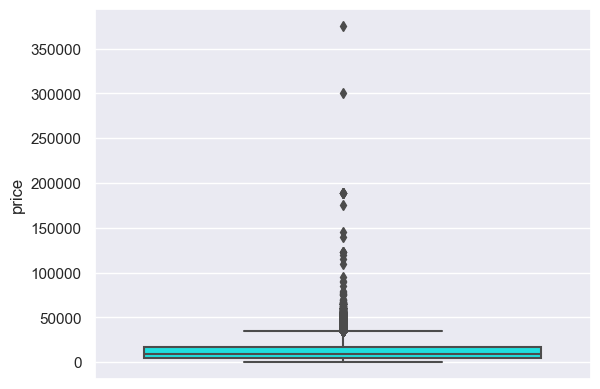

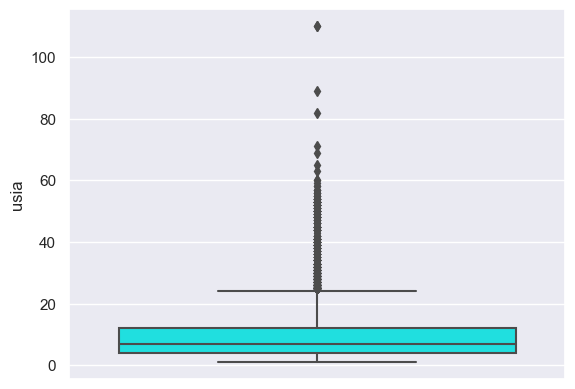

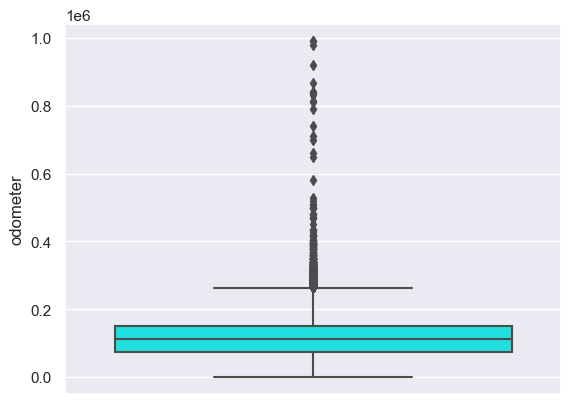

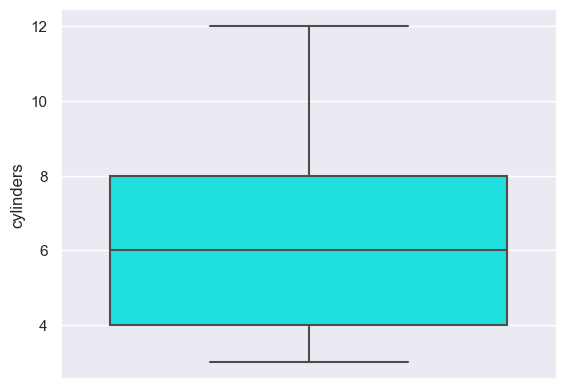

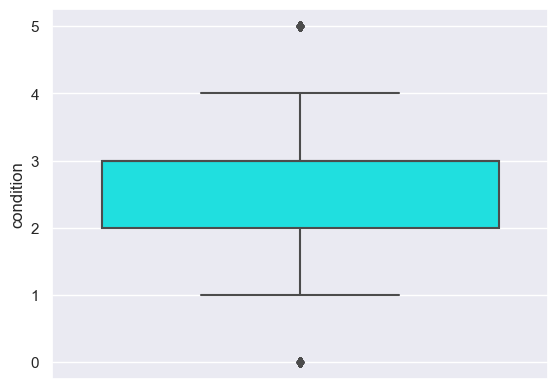

In [30]:
# analisis outliers pada dataframe menggunakan boxplot
numeric_columns = ['price','usia','odometer','cylinders','condition']
for column in numeric_columns:
    sns.boxplot(data=vehicle_data,y=column,color='cyan')
    plt.show()

Sesuai dengan ekspektasi bahwa beberapa kolom memiliki outliers seperti kolom `price`, `usia`, `odometer` dan `condition`. Namun pada kolom `cylinders` nampaknya tidak memiliki outliers.

Tahap kedua yang akan kita lakukan adalah pengecekan menggunakan `histogram` dengan menggunakan parameter sebelumnya.

### Histogram Parameter Inti <a id= 'cont_21' ></a>

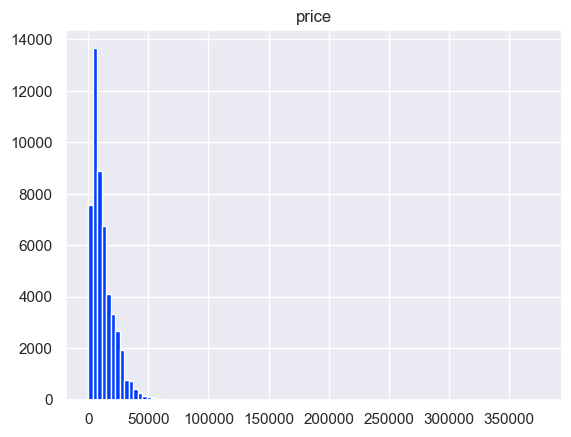

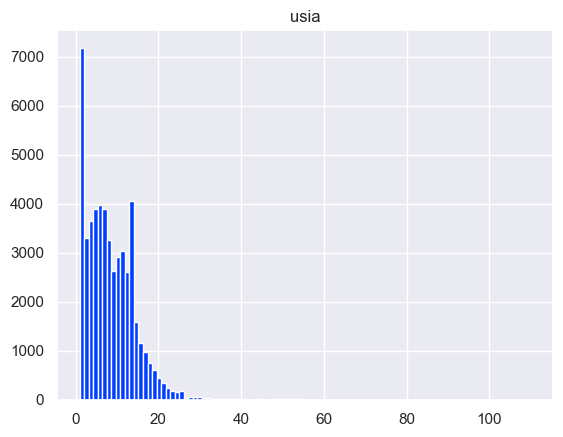

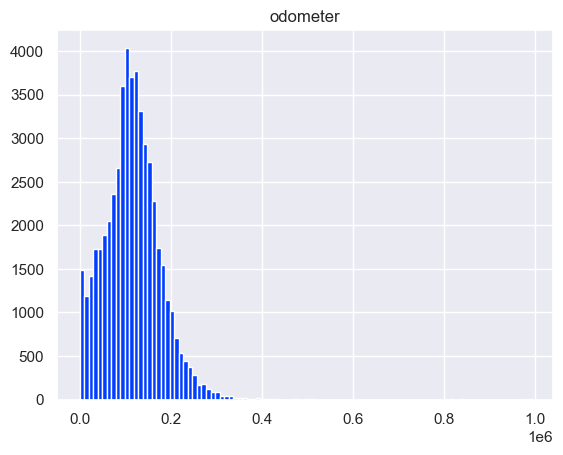

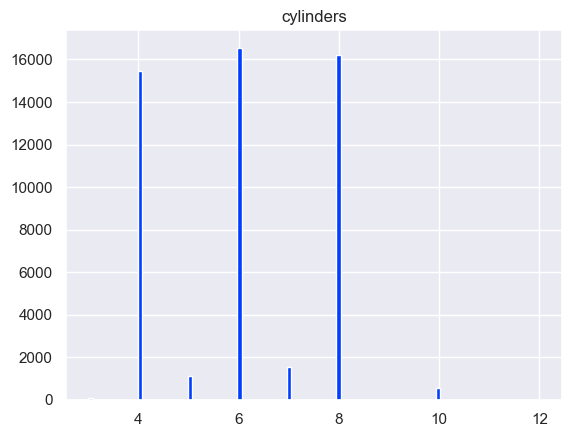

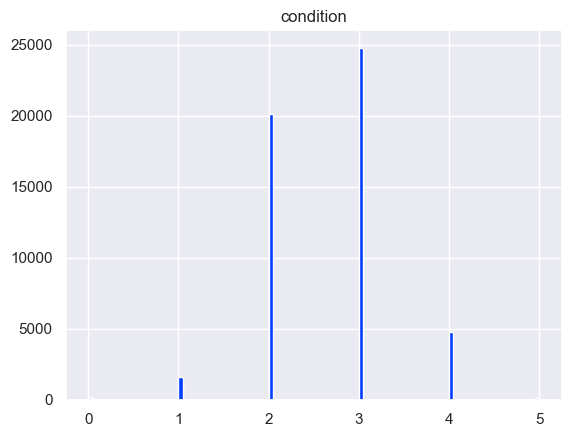

In [31]:
# distribusi dataframe menggunakan histogram
for column in numeric_columns:
    vehicle_data[[column]].hist(bins=100)
    plt.show()

Dari beberapa grafik `histogram` diatas nampaknya kita kesulitan dalam membacanya dikarenakan adanya outliers. Mari kita modifikasi grafiknya untuk mendapatkan gambaran yang lebih jelas.

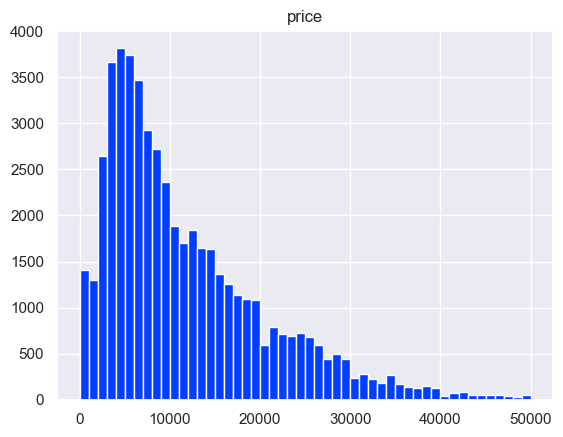

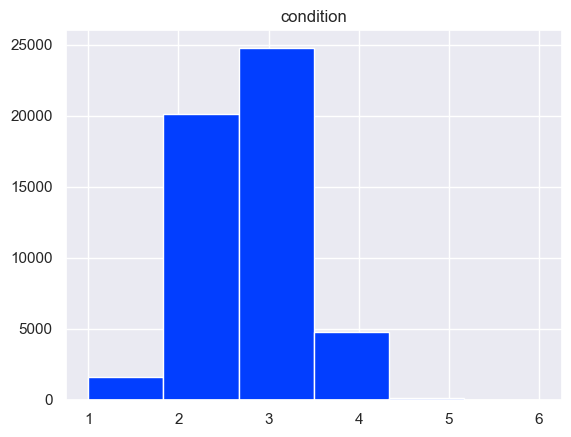

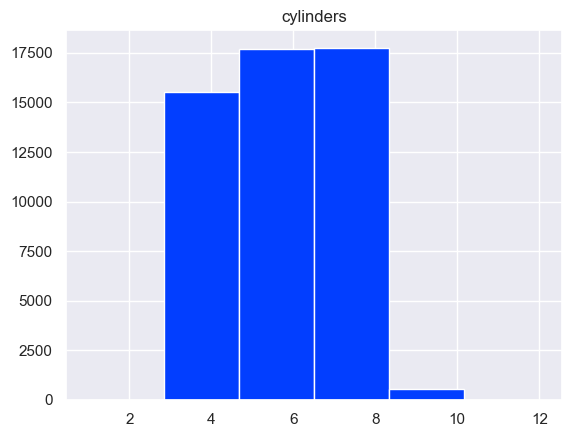

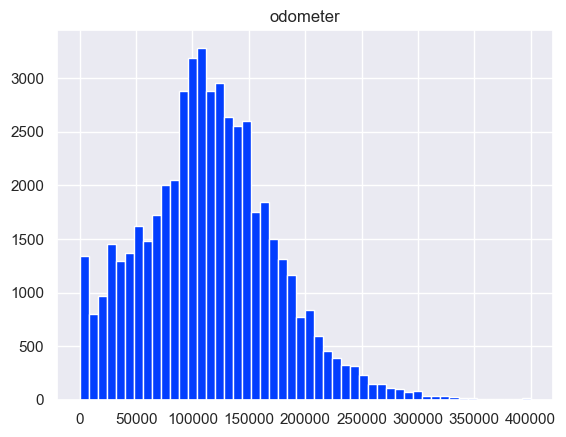

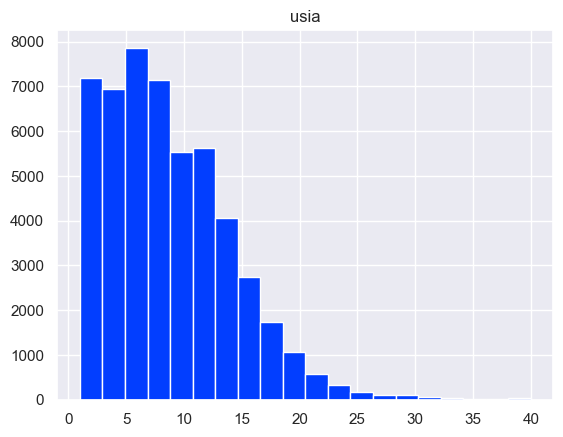

In [32]:
# memperbaiki skala histogram untuk mempermudah pembacaan diagram
vehicle_data[['price']].hist(bins=50,range=(0,50000))
vehicle_data[['condition']].hist(bins=6,range=(1,6))
vehicle_data[['cylinders']].hist(bins=6,range=(1,12))
vehicle_data[['odometer']].hist(bins=50,range=(0,400000))
vehicle_data[['usia']].hist(bins=20,range=(1,40))

# menampilkan chart
plt.show()

Dari kolom `price` dapat kita tarik bahwa data terdistribusi pada kisaran harga `USD 4000` hingga `USD 5000`. Pada kolom `condition` data terdistribusi pada `kondisi 3 - excellent`, pada kolom `cylinders` data terkonsentrasi pada `jumlah silinder 6 hingga 8`. Pada kolom `odometer` data terdistribusi pada kisaran `100000 miles`. Terakhir pada kolom `usia` data terkonsentrasi pada `usia 5 hingga 7 tahun`.

Tahap ketiga, mari kita cek korelasi dataset berdasarkan parameter diatas.

### Tabel Korelasi <a id= 'cont_22' ></a>

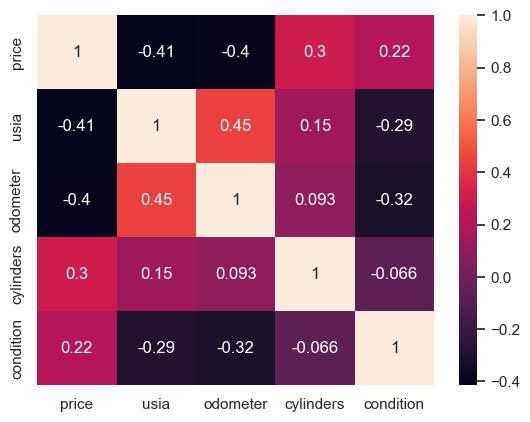

In [33]:
# pengecekan korelasi antar dataset secara numerik
corr = vehicle_data[numeric_columns].corr()
sns.heatmap(corr,annot=True)

# menampilkan chart
plt.show()

Dapat kita lihat korelasi yang kurang kuat antara kolom `price` dengan beberapa kolom yang lainya. Hal tersebut dikarenakan masih terdapatnya outliers sehingga dataset kurang memilki korelasi yang baik dan belum dapat kita tentukan faktor yang mempengaruhi harga mobil.

Tahap keempat, mari kita cek secara grafik korelasi data kita.

### Grafik Korelasi <a id= 'cont_23' ></a>

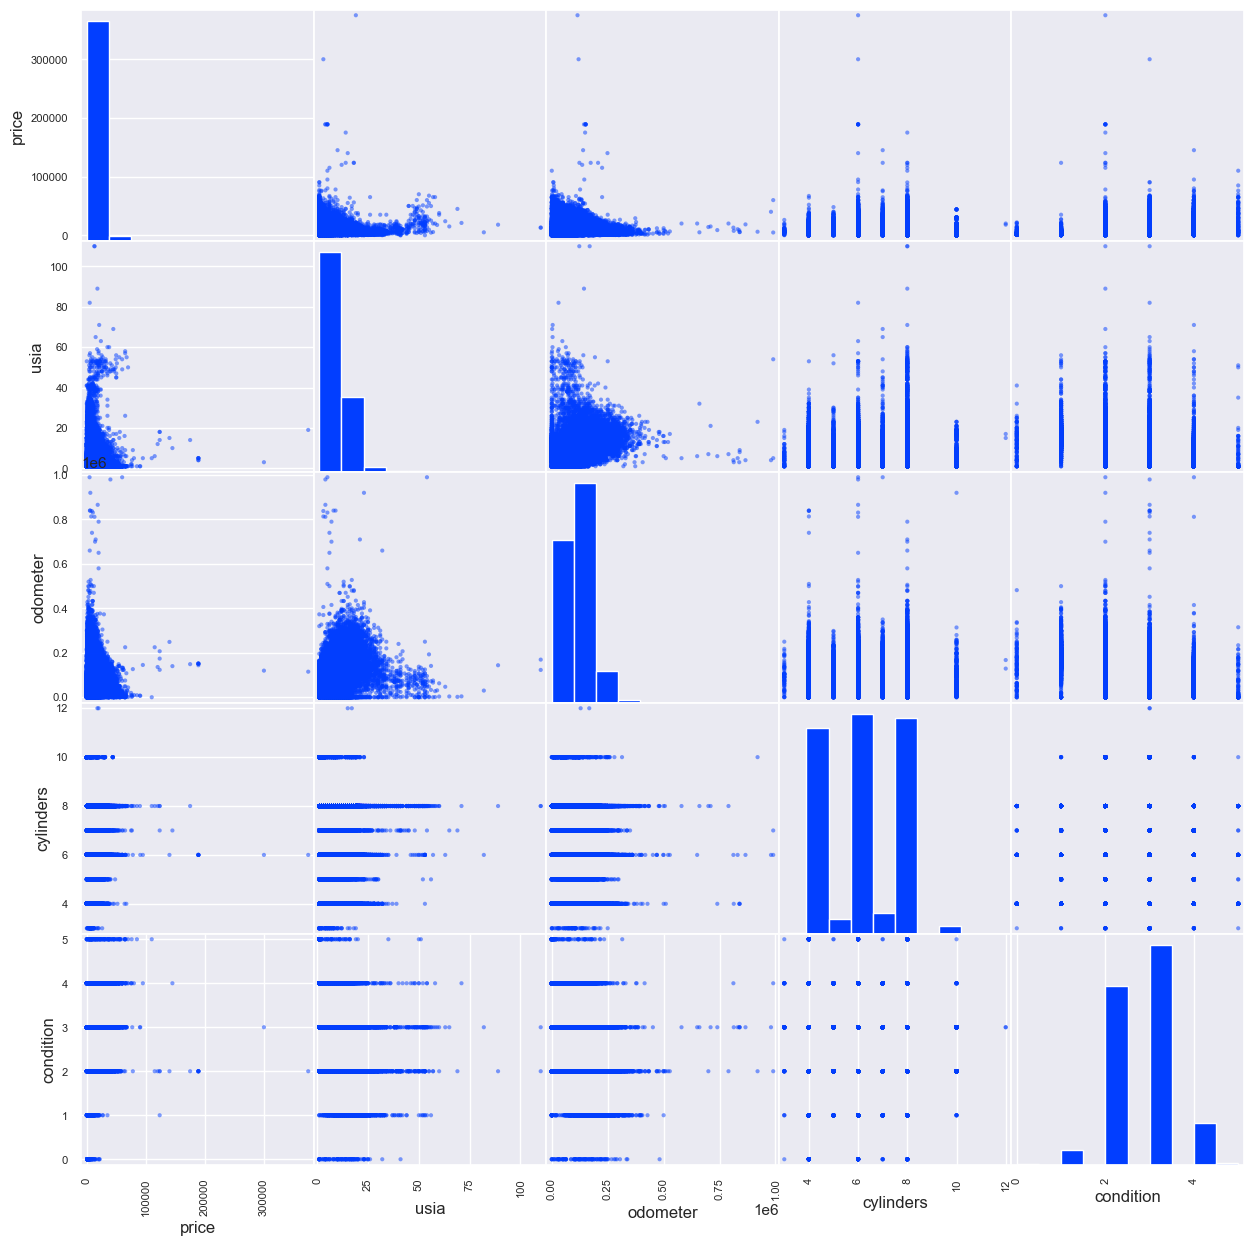

In [34]:
# pengecekan korelasi antar dataset secara grafik
pd.plotting.scatter_matrix(vehicle_data[numeric_columns],figsize=(15,15))
plt.show()

Dapat kita simpulkan bahwa masih banyak data-data yang berserakan yang menyebabkan kurang kuatnya relasi.

Tahap kelima, mari kita persempit ruang lingkupnya. Mari kita plot `price` terhadap kolom-kolom lainya menggunakan grafik `hexbin`.

### Grafik Hexbin <a id= 'cont_24' ></a>

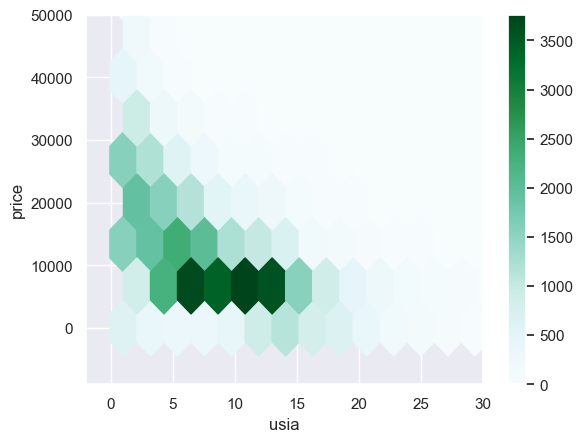

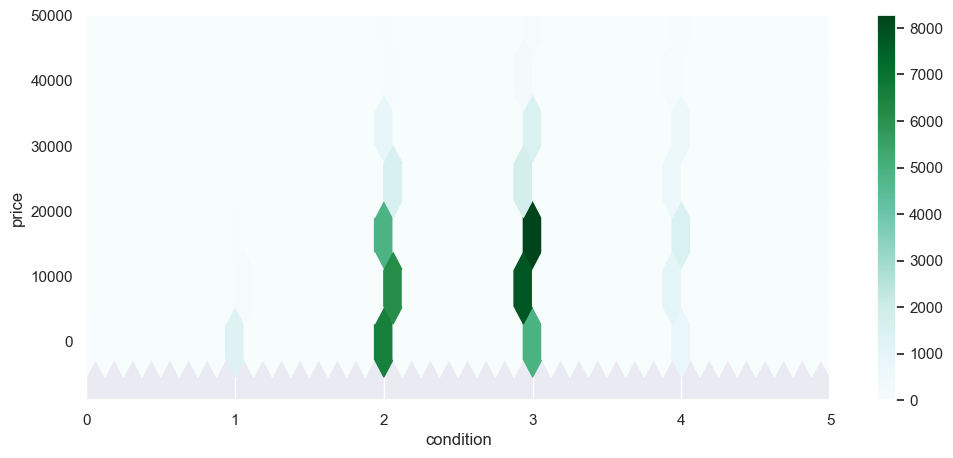

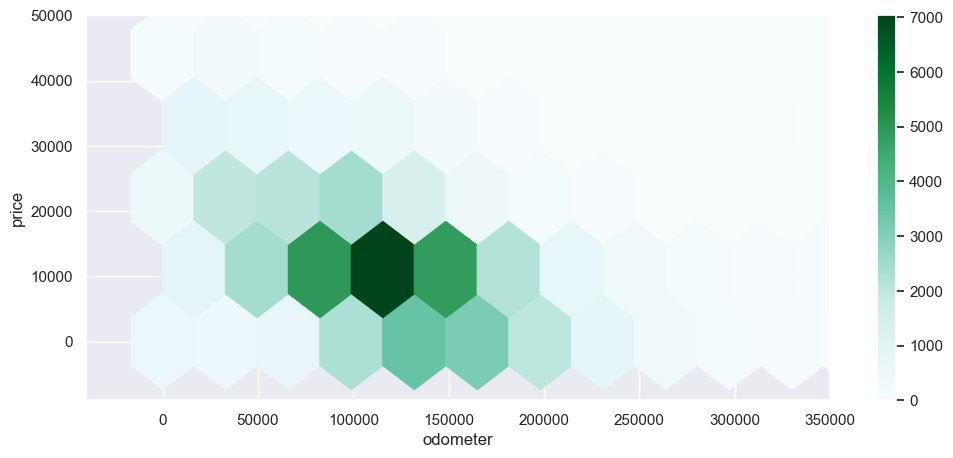

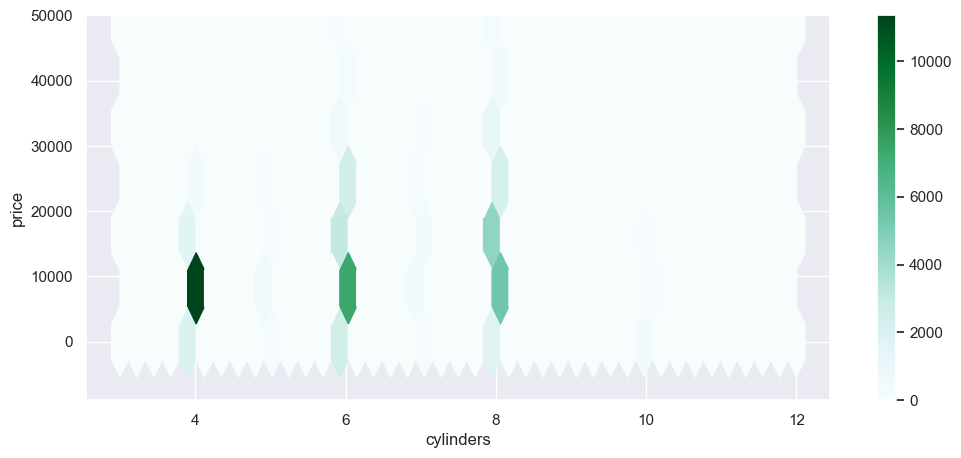

In [35]:
# analisis scatter plot terhadap price kendaraan
vehicle_data.plot(kind='hexbin',gridsize= 50,x='usia',y='price',xlim=(-2,30),ylim=(-9000,50000))
vehicle_data.plot(kind='hexbin',gridsize= 40,x='condition',y='price',xlim=(0,5),ylim=(-9000,50000),figsize=(12,5))
vehicle_data.plot(kind='hexbin',gridsize= 30,x='odometer',y='price',xlim=(-40000,350000),ylim=(-9000,50000),figsize=(12,5))
vehicle_data.plot(kind='hexbin',gridsize= 40,x='cylinders',y='price',ylim=(-9000,50000),figsize=(12,5))

# menampilkan chart
plt.show()

Dapat kita rangkum sebagai berikut:
- Hubungan antara `price` dan `usia` berkisar dikisaran usia `5 hingga 12 tahun` dengan jumlah berkisar `3500` dengan harga berkisar `USD 8000`
- Hubungan antara `price` dan `condition` berkisar dikondisi `3` dengan jumlah berkisar `8000` dengan harga berkisar `USD 20000`
- Hubungan antara `price` dan `odometer` berkisar dikisaran odometer `120000` dengan jumlah berkisar `7000` dengan harga berkisar `USD 10000`
- Hubungan antara `price` dan `cylinders` berkisar jumlah silinder `4` dengan jumlah berkisar `10000` dengan harga berkisar `USD 10000`

## Mempelajari dan Menangani Outlier <a id= 'cont_25' ></a>

Berdasarkan analisis outliers menggunakan `boxplot`, tahap selanjutnya kita akan menangani nilai outliers tersebut sehingga data kita bisa peroleh secara akurat. Beberapa kolom yang memiliki outliers dan yang akan kita singkirkan yaitu kolom `price`, `usia` dan `odometer`. Mari kita tentukan batas-batas ourliersnya sebagai berikut:

In [36]:
# menentukan batas bawah outlier 

# batas bawah outlier kolom 'price'
Q1_price = vehicle_data['price'].quantile(0.25)
Q3_price = vehicle_data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
price_lower = Q1_price - 1.5*IQR_price

# batas bawah outlier kolom 'usia'
Q1_usia = vehicle_data['usia'].quantile(0.25)
Q3_usia = vehicle_data['usia'].quantile(0.75)
IQR_usia = Q3_usia - Q1_usia
usia_lower = Q1_usia - 1.5*IQR_usia

# batas bawah outlier kolom 'odometer'
Q1_odometer = vehicle_data['odometer'].quantile(0.25)
Q3_odometer = vehicle_data['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
odometer_lower = Q1_odometer - 1.5*IQR_odometer

In [37]:
# menentukan batas atas outlier 

# batas atas outlier kolom 'price'
price_upper = Q3_price + 1.5*IQR_price

# batas atas outlier kolom 'usia'
usia_upper = Q3_usia + 1.5*IQR_usia

# batas atas outlier kolom 'odometer'
odometer_upper = Q3_odometer + 1.5*IQR_odometer

Selanjutnya mari kita filter datanya kedalam dataframe yang baru `clean_vehicle_data` tanpa mengandung outliers tersebut.

In [38]:
# menyimpan data tanpa outlier dalam DataFrame yang terpisah

# membersihkan outlier kolom 'price'
clean_vehicle_data = vehicle_data.query('price >= @price_lower and price <= @price_upper')

# membersihkan outlier kolom 'usia'
clean_vehicle_data = clean_vehicle_data.query('usia >= @usia_lower and usia <= @usia_upper')

# membersihkan outlier kolom 'odometer'
clean_vehicle_data = clean_vehicle_data.query('odometer >= @odometer_lower and odometer <= @odometer_upper')

# informasi dataframe terbaru setelah cleanup
clean_vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48417 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         48417 non-null  int64         
 1   model_year    48417 non-null  int32         
 2   model         48417 non-null  object        
 3   condition     48417 non-null  int32         
 4   cylinders     48417 non-null  int32         
 5   fuel          48417 non-null  object        
 6   odometer      48417 non-null  int32         
 7   transmission  48417 non-null  object        
 8   type          48417 non-null  object        
 9   paint_color   39698 non-null  object        
 10  is_4wd        48417 non-null  int32         
 11  date_posted   48417 non-null  datetime64[ns]
 12  days_listed   48417 non-null  int64         
 13  hari          48417 non-null  int32         
 14  tahun         48417 non-null  int32         
 15  bulan         48417 non-null  int32      

Terjadi penurunan jumlah data dari `51525` menjadi `48417`.

## Mempelajari Parameter Inti Tanpa Outlier <a id= 'cont_26' ></a>

Selanjutnya, kita akan melakukan komparasi antara data `dengan outliers` dengan `data tanpa outliers` untuk masing-masing datasets.

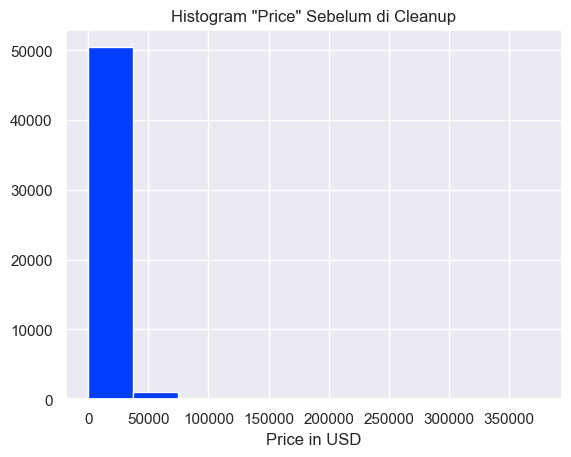

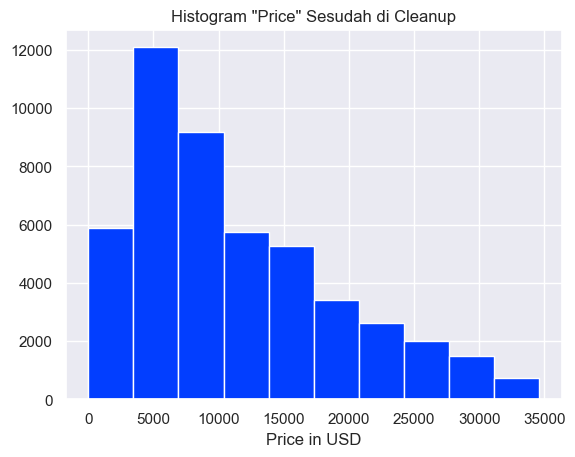

In [39]:
# komparasi kolom 'price' sebelum dan sesudah di filter dari outliers
# sebelum di cleanup
vehicle_data[['price']].hist()
plt.title('Histogram "Price" Sebelum di Cleanup')
plt.xlabel('Price in USD')

# sesudah di cleanup
clean_vehicle_data[['price']].hist()
plt.title('Histogram "Price" Sesudah di Cleanup')
plt.xlabel('Price in USD')
plt.show() 

Dari grafik diatas dapat kita lihat bahwa pada grafik yang memiliki `outliers` memiliki range yang cukup besar hingga `USD 350000` dibandingkan dengan `tanpa outliers` yang hanya sebesar `USD 35000`. Pada data yang memiliki `outliers` datanya terkonsentrasi pada nilai `USD 25000` dibandingkan dengan data `tanpa outliers` yang terlihat jelas berada pada konsentrasi `USD 5000`. Perbedaan yang cukup signifikan.

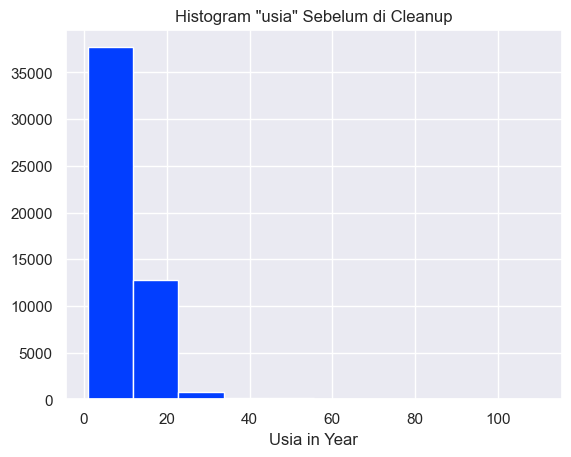

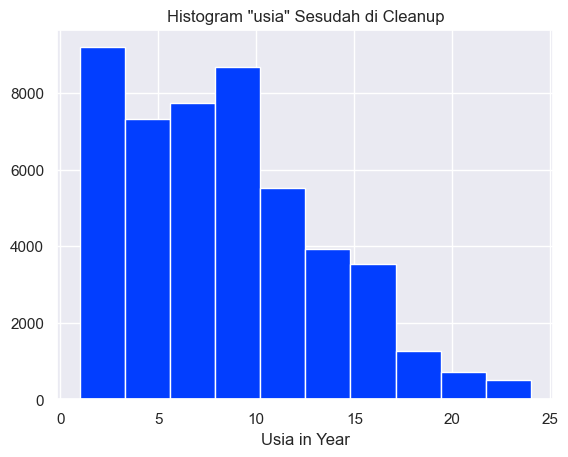

In [40]:
# komparasi kolom 'usia' sebelum dan sesudah di filter dari outliers
# sebelum di cleanup
vehicle_data[['usia']].hist()
plt.title('Histogram "usia" Sebelum di Cleanup')
plt.xlabel('Usia in Year')

# sesudah di cleanup
clean_vehicle_data[['usia']].hist()
plt.title('Histogram "usia" Sesudah di Cleanup')
plt.xlabel('Usia in Year')
plt.show() 

Dari grafik diatas dapat kita lihat bahwa pada grafik yang memiliki `outliers` memiliki range yang cukup besar hingga `Usia 100 Tahun` dibandingkan dengan `tanpa outliers` yang hanya sebesar `Usia 25 Tahun`. Pada data yang memiliki `outliers` datanya terkonsentrasi pada nilai `Usia 5 Tahun` dibandingkan dengan data `tanpa outliers` yang terlihat jelas berada pada konsentrasi `Usia 1 hingga 2 Tahun`.

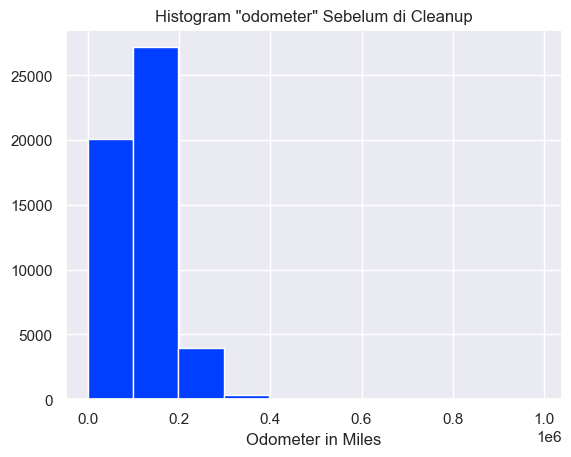

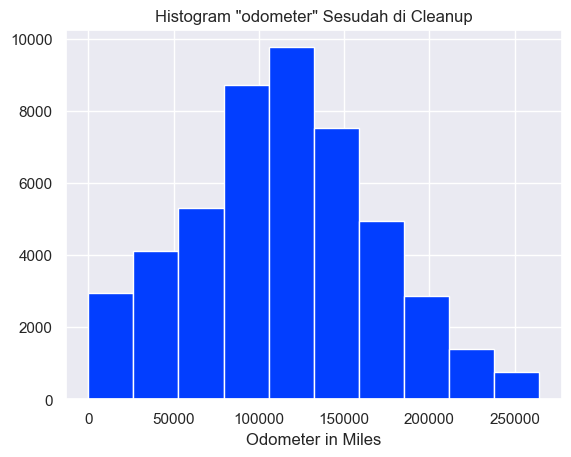

In [41]:
# komparasi kolom 'odometer' sebelum dan sesudah di filter dari outliers
# sebelum di cleanup
vehicle_data[['odometer']].hist()
plt.title('Histogram "odometer" Sebelum di Cleanup')
plt.xlabel('Odometer in Miles')

# sesudah di cleanup
clean_vehicle_data[['odometer']].hist()
plt.title('Histogram "odometer" Sesudah di Cleanup')
plt.xlabel('Odometer in Miles')
plt.show() 

Dari grafik diatas dapat kita lihat bahwa pada grafik yang memiliki `outliers` memiliki range yang cukup besar hingga `Jarak Tempuh 1000000 Miles` dibandingkan dengan `tanpa outliers` yang hanya sebesar `Jarak Tempuh 270000 Miles`. Pada data yang memiliki `outliers` datanya terkonsentrasi pada nilai `Jarak Tempuh 150000 Miles` dibandingkan dengan data `tanpa outliers` yang terlihat jelas berada pada konsentrasi `Jarak Tempuh 130000 Miles`.

## Masa Berlaku Iklan <a id= 'cont_27' ></a>

Selanjutnya kita akan menganalisis `Masa Berlaku Iklan` dimana kita akan mencari nilai rata-rata dan median serta menentukan keumuman lama waktu tayang iklan.

### Rata-rata Keumuman Waktu Tayang Iklan <a id= 'cont_28' ></a>

In [42]:
# menghitung rata-rata dan median dari 'days_listed'
print(f"Rata-rata 'days_listed'\t: {clean_vehicle_data['days_listed'].mean():.1f}")
print(f"Median 'days_listed'\t: {clean_vehicle_data['days_listed'].median()}")

Rata-rata 'days_listed'	: 39.5
Median 'days_listed'	: 33.0


Dapat kita lihat nilai `rata-rata iklan tayang 39 hari` dan nilai `median iklan tayang 33 hari`. Dari keduanya cukup besar perbedaanya sehingga nilai yang akan kita ambil untuk proses perhitunganya adalah nilai `median` untuk mendapatkan hasil yang akurat.

In [43]:
# keumuman kendaraan ditampilkan pada iklan berdasarkan model kendaraan
days_model = clean_vehicle_data.groupby('model')['days_listed'].median()
general_days = pd.Series(days_model.values)
general_days.median()

33.0

Dari perhitungan diatas kita dapatkan `lama waktu tayang iklan mobil umumnya` adalah `33 hari`.

Selanjutnya kita akan menentukan kapan `waktu dihapus cepat` dan kapan `waktu dihapus lama`.

### Mencari Waktu Tayang Tersingkat <a id= 'cont_29' ></a>

Untuk menghitung kapan waktu dihapus dengan singkat dimana nilainya kurang dari `Quartil 1` dengan formula seperti berikut:

In [44]:
# menghitung quartil pertama dan quartil ketiga untuk days_listed
Q1_days = clean_vehicle_data['days_listed'].quantile(0.25)
Q3_days = clean_vehicle_data['days_listed'].quantile(0.75)
limit_upper = 1.5*(Q3_days - Q1_days) + Q3_days

# mencari waktu ditayangkan sangat singkat
clean_vehicle_data['too_fast'] = clean_vehicle_data['days_listed'] <= Q1_days
too_fast = clean_vehicle_data[clean_vehicle_data['too_fast'] == 1]
too_fast_stat = too_fast[['date_posted','days_listed','too_fast']]

print(f"Jumlah data yang tergolong 'too_fast' sebanyak: {len(too_fast_stat)}")
too_fast_stat.sort_values('days_listed',ascending=True)

Jumlah data yang tergolong 'too_fast' sebanyak: 12690


,date_posted,days_listed,too_fast
29377,2018-08-27,0,True
16138,2019-01-27,0,True
41940,2018-09-28,0,True
16046,2018-05-31,0,True
48843,2018-08-19,0,True
...,...,...,...
48107,2019-03-24,19,True
41046,2018-05-23,19,True
22297,2018-11-06,19,True
17112,2018-10-02,19,True


Dapat kita lihat jumlah iklan yang tergolong cepat dihapus yaitu `0 hari hingga 19 hari` dengan total iklan yang terhitung sebanyak `12690 iklan`. Untuk yang bernilai `0 hari` seperti pada tanggal `2018-08-27` dan yang bernilai `19 hari` seperti tanggal `2018-06-23`.

### Mencari Waktu Tayang Terlama <a id= 'cont_30' ></a>

In [45]:
# mencari waktu ditayangkan sangat lama
clean_vehicle_data['too_slow'] = clean_vehicle_data['days_listed'] >= Q3_days
too_slow = clean_vehicle_data[clean_vehicle_data['too_slow'] == 1]
too_slow_stat = too_slow[['date_posted','days_listed','too_slow']]

print(f"Jumlah data yang tergolong 'too_slow' sebanyak: {len(too_slow_stat)}")
too_slow_stat.sort_values('days_listed',ascending=False)

Jumlah data yang tergolong 'too_slow' sebanyak: 12453


,date_posted,days_listed,too_slow
4360,2018-05-24,271,True
28756,2019-01-08,267,True
2224,2019-01-24,263,True
51,2018-11-29,261,True
7875,2019-02-02,256,True
...,...,...,...
26920,2019-01-25,53,True
7792,2019-02-03,53,True
12163,2019-01-15,53,True
1817,2018-12-31,53,True


Dapat kita lihat jumlah iklan yang tergolong lambat dihapus yaitu `53 hari hingga 271 hari` dengan total iklan yang terhitung sebanyak `12453 iklan`. Untuk yang bernilai `53 hari` seperti pada tanggal `2018-09-21` dan yang bernilai `271 hari` seperti tanggal `2018-05-24`.

## Harga Rata-Rata Setiap Jenis Kendaraan <a id= 'cont_31' ></a>

Selanjutnya, kita akan menghitung `jumlah iklan` dan `harga rata-rata` mobil berdasarkan `tipe` mobil serta memilih 2 tipe mobil dengan jumlah iklan paling banyak.

In [46]:
# membuat pivot tabel untuk jenis kendaraan terhadap jumlah iklan dan rata-rata harga
mean_price_vehicle = clean_vehicle_data.pivot_table(index='type',values='price',aggfunc=('count','median'))
mean_price_vehicle.columns = ['jumlah iklan','harga']

# mensortir jumlah iklan terbanyak berdasarkan tipe kendaraan
mean_price_vehicle.sort_values('jumlah iklan', ascending=False)

,jumlah iklan,harga
type,,
sedan,12024,5995.0
SUV,11915,8775.0
truck,11109,14900.0
pickup,6311,13995.0
coupe,2026,12900.0
wagon,1503,7900.0
mini-van,1145,6500.0
hatchback,1007,5990.0
van,581,7800.0


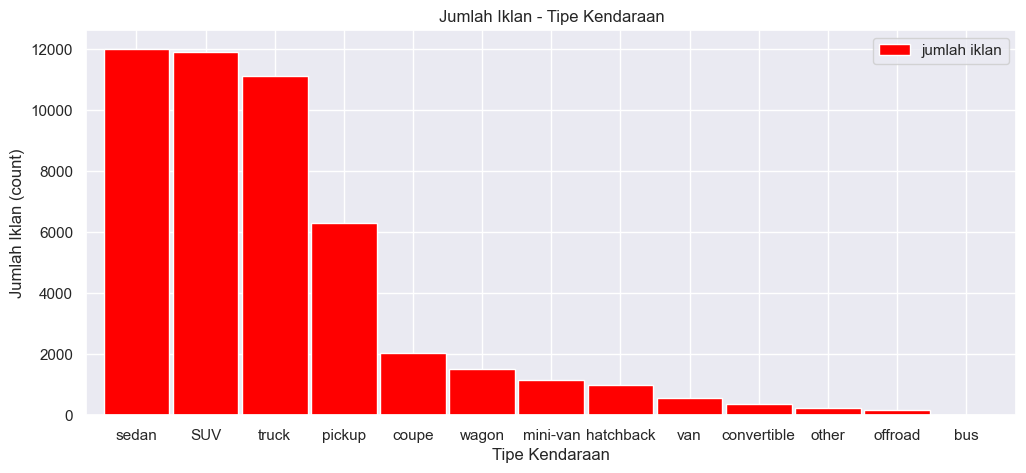

In [47]:
# grafik ketergantungan iklan dengan jenis kendaraan
mean_price_vehicle.sort_values('jumlah iklan', ascending=False).plot(
    kind='bar',
    y='jumlah iklan',
    figsize=(12,5),
    width=0.95,
    rot=0,
    color='red')

# membuat label dan judul
plt.title('Jumlah Iklan - Tipe Kendaraan')
plt.xlabel('Tipe Kendaraan')
plt.ylabel('Jumlah Iklan (count)')

# menampilkan grafik
plt.show()

Dari analisis diatas dua jenis mobil yang memiliki jumlah iklan terbanyak yaitu `tipe sedan` dan `tipe suv` dengan masing-masing jumlahnya `12024 iklan` dan `11915 iklan`.

## Faktor Harga <a id= 'cont_32' ></a>

Sampai ditahap terakhir yaitu apakah yang menentukan `Faktor Harga Mobil` berdasarkan data yang kita terima. Kita akan pelajari dari dua tipe kendaraan yang memiliki iklan paling banyak yaitu `tipe sedan` dan `tipe suv`. Kita akan analisis menggunakan `grafik plot korelasi` untuk data `numerik`, `grafik boxplot` untuk data `kategori` dan `matriks korelasi`.

Pertama, kita filter datanya untuk masing-masing kendaraan sebagai berikut:

In [48]:
# memfilter data untuk mobil sedan
sedan_data = clean_vehicle_data.query('type == "sedan"')
sedan_data = sedan_data[['price','usia','odometer','condition','transmission','paint_color']]

# memfilter data untuk mobil suv
suv_data = clean_vehicle_data.query('type == "SUV"')
suv_data = suv_data[['price','usia','odometer','condition','transmission','paint_color']]

Selanjutnya kita akan membuat `grafik korelasi` untuk data `numerik` (harga, usia, kondisi, odometer) dan `grafik boxplot` untuk data `kategorik` (transmisi dan warna). Untuk data kategorik yang ditampilkan adalah kategorik yang jumlah iklanya lebih dari 50.

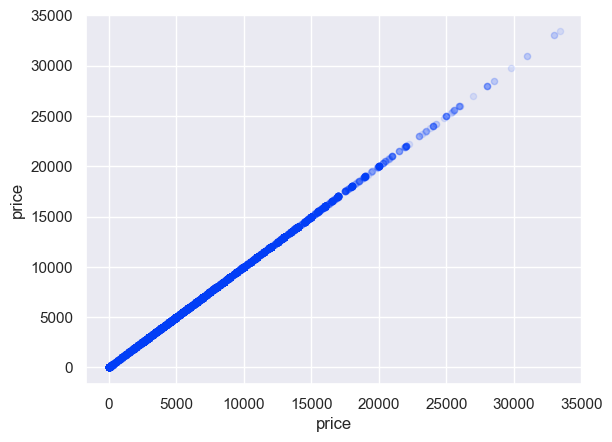

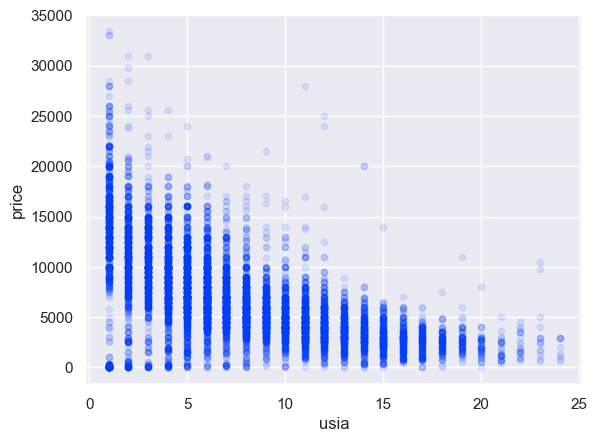

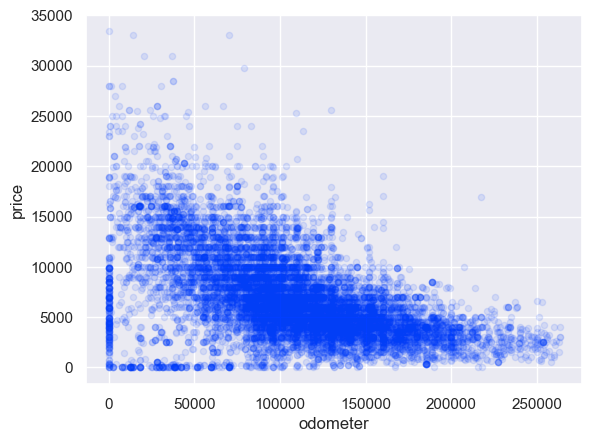

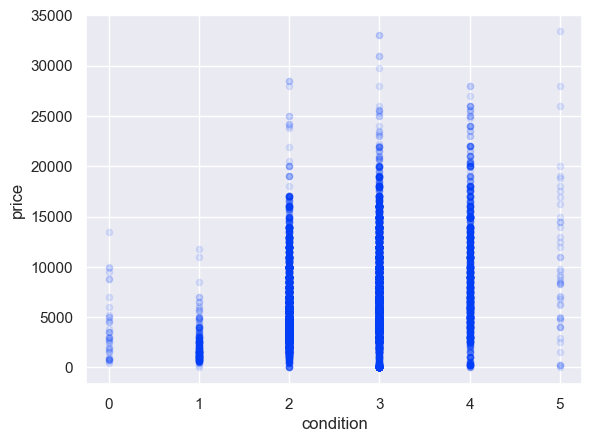

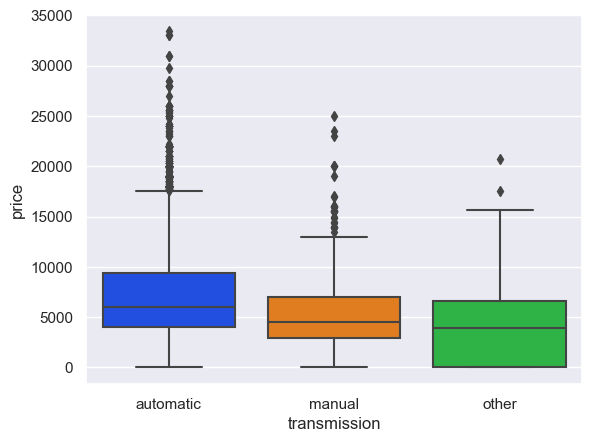

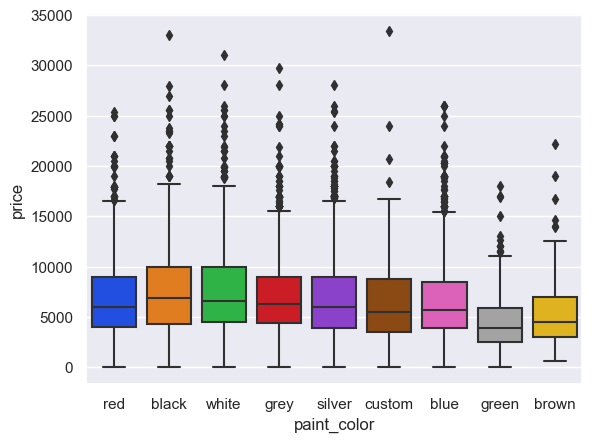

In [49]:
# membuat grafik korelasi untuk mobil sedan
for col in sedan_data.columns:
    # pengkondisian kategori
    if col == 'transmission':
        # membuat dataframe penampungan data terfilter
        filter_sedan_transmission = pd.DataFrame()
        for unik_t_sedan in sedan_data['transmission'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if sedan_data.query('transmission == @unik_t_sedan')['transmission'].count() >= 50:
                # memfilter data kategorik
                sedan_transmission = sedan_data.query('transmission == @unik_t_sedan')
                # menggabungkan data ke dataframe tampungan
                filter_sedan_transmission = pd.concat([filter_sedan_transmission,sedan_transmission]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_sedan_transmission,x=col,y='price')
        plt.show()
    # pengkondisian kategori
    elif col == 'paint_color':
        # membuat dataframe penampungan data terfilter
        filter_sedan_color = pd.DataFrame()
        for unik_c_sedan in sedan_data['paint_color'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if sedan_data.query('paint_color == @unik_c_sedan')['paint_color'].count() >= 50:
                # memfilter data kategorik
                sedan_color = sedan_data.query('paint_color == @unik_c_sedan')
                # menggabungkan data ke dataframe tampungan
                filter_sedan_color = pd.concat([filter_sedan_color,sedan_color]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_sedan_color,x=col,y='price')
        plt.show()
    else:
        # membuat grafik scatter untuk data numerik
        sedan_data.plot(kind="scatter",x=col,y='price',alpha=0.1)
        plt.show()

Dari `grafik korelasi` mobil sedan di atas terlihat korelasi yang cukup kuat antara `price` dengan `usia` dan `price` dengan `usia`, namun korelasi yang lemah antara `price` dengan `condition`.

Sedangkan untuk `grafik boxplot` mobil sedan di atas terlihat untuk kategori `transmisi`, untuk jenis `automatik` memiliki harga rata-rata yang paling tinggi dibandingkan dengan jenis transmisi lainya. Sedangkan untuk kategori `warna`, untuk jenis `warna hitam` memiliki harga rata-rata yang paling tinggi dibandingkan dengan jenis warna lainya.

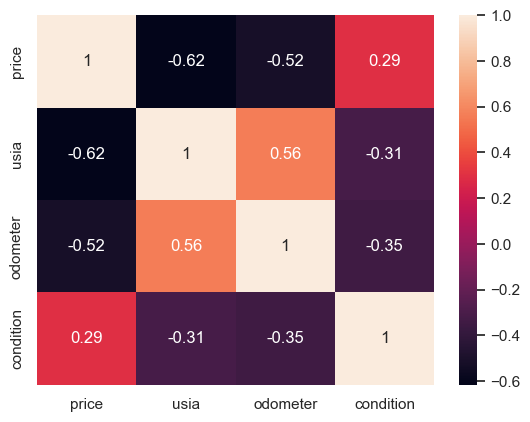

In [50]:
# membuat tabel korelasi harga untuk mobil sedan
corr = sedan_data[['price','usia','odometer','condition']].corr()
sns.heatmap(corr,annot=True)
plt.show()

Dari tabel korelasi untuk `mobil sedan` terbukti bahwa korelasi yang `cukup kuat` antara `price` dengan `usia` dan `price` dengan `odometer` yang memiliki korelasi negatif. Hal tersebut berarti semakin tinggi `Harga Jual` maka semakin rendah `Usia` dan `Odometer` mobil sedan. Korelasi lemah antara `price` dan `condition` sehingga tidak memberikan pengaruh yang signifikan terhadap `Harga Jual` mobil sedan. 

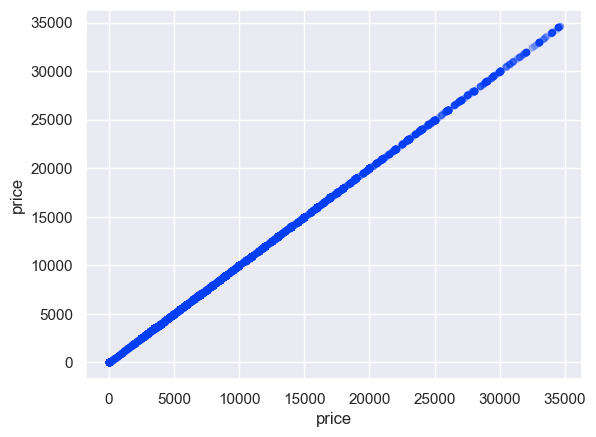

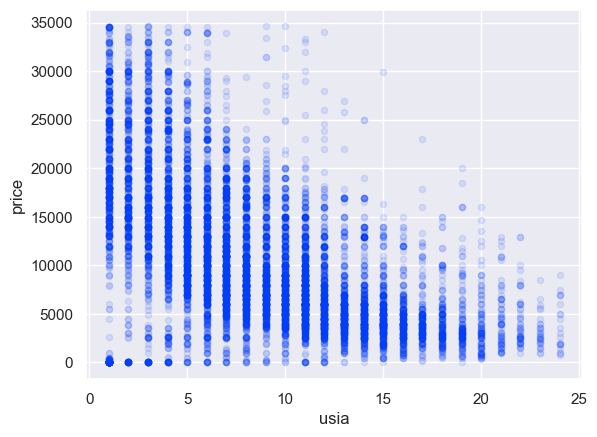

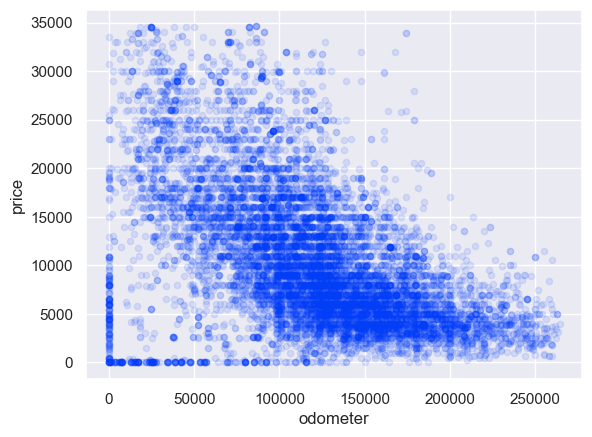

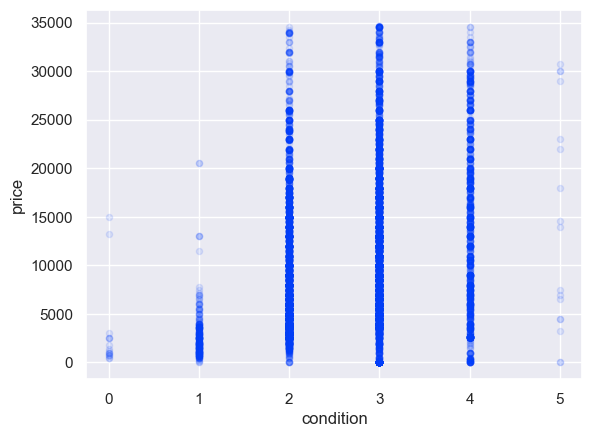

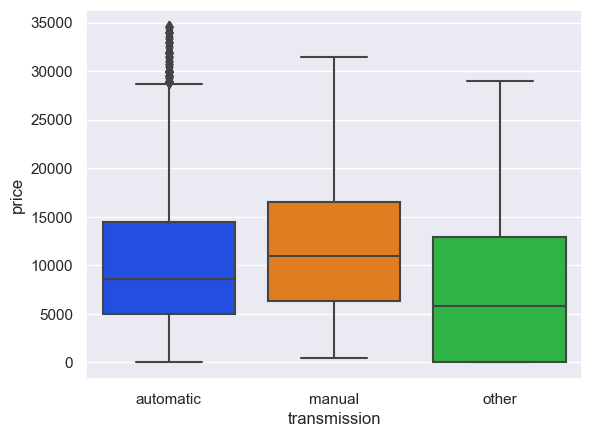

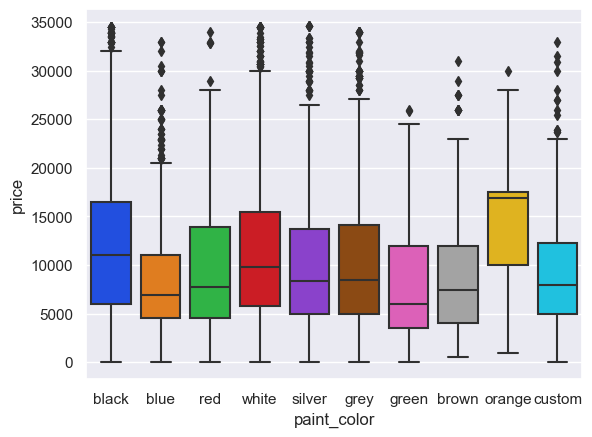

In [51]:
# membuat grafik korelasi untuk mobil suv
for col in suv_data.columns:
    # pengkondisian kategori
    if col == 'transmission':
        # membuat dataframe penampungan data terfilter
        filter_suv_transmission = pd.DataFrame()
        for unik_t_suv in suv_data['transmission'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if suv_data.query('transmission == @unik_t_suv')['transmission'].count() >= 50:
                # memfilter data kategorik
                suv_transmission = suv_data.query('transmission == @unik_t_suv')
                # menggabungkan data ke dataframe tampungan
                filter_suv_transmission = pd.concat([filter_suv_transmission,suv_transmission]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_suv_transmission,x=col,y='price')
        plt.show()
    # pengkondisian kategori
    elif col == 'paint_color':
        # membuat dataframe penampungan data terfilter
        filter_suv_color = pd.DataFrame()
        for unik_c_suv in suv_data['paint_color'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if suv_data.query('paint_color == @unik_c_suv')['paint_color'].count() >= 50:
                # memfilter data kategorik
                suv_color = suv_data.query('paint_color == @unik_c_suv')
                # menggabungkan data ke dataframe tampungan
                filter_suv_color = pd.concat([filter_suv_color,suv_color]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_suv_color,x=col,y='price')
        plt.show()
    else:
        # membuat grafik scatter untuk data numerik
        suv_data.plot(kind="scatter",x=col,y='price',alpha=0.1)
        plt.show()

Dari `grafik korelasi` mobil suv di atas terlihat korelasi yang cukup kuat antara `price` dengan `usia`, namun korelasi yang lemah antara `price` dengan `usia` dan `price` dengan `condition`.

Sedangkan untuk `grafik boxplot` mobil suv di atas terlihat untuk kategori `transmisi`, untuk jenis `manual` memiliki harga rata-rata yang paling tinggi dibandingkan dengan jenis transmisi lainya. Sedangkan untuk kategori `warna`, untuk jenis `warna orange` memiliki harga rata-rata yang paling tinggi dibandingkan dengan jenis warna lainya.

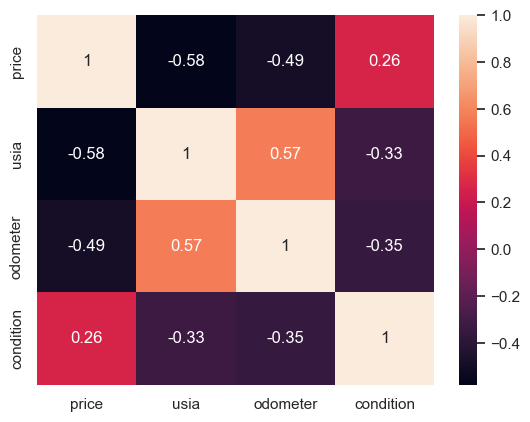

In [52]:
# membuat tabel korelasi harga untuk mobil sedan
corr = suv_data[['price','usia','odometer','condition']].corr()
sns.heatmap(corr,annot=True)
plt.show()

Dari tabel korelasi untuk `mobil suv` terbukti bahwa korelasi yang `cukup kuat` antara `price` dengan `usia` yang memiliki korelasi negatif. Hal tersebut berarti semakin tinggi `Harga Jual` maka semakin rendah `Usia` mobil suv. Korelasi lemah antara `price` dengan `odometer` dan `price` dengan `condition` sehingga tidak memberikan pengaruh yang signifikan terhadap `Harga Jual` mobil suv. 

## Kesimpulan Umum <a id= 'cont_33' ></a>

Analisis faktor yang mempengaruhi harga jual mobil dimulai dengan pengecekan sumber data diantaranya yaitu `mengecek sampel`, `mengecek nilai yang hilang` dan `mengecek tipe data`. sumber data memiliki nilai yang hilang diantaranya pada kolom `model_year`, `cylinders`, `odometer`, `paint_color` dan `is_4wd`. Selanjutnya dilakukan perbaikan untuk mengisi nilai yang hilang.

Selanjutnya adalah perbaikan tipe data untuk beberapa kolom diantranya pada kolom `model_year`, `cylinders`, `odometer`, `is_4wd` dan `date_posted` menggunakan tipe data yang sesuai. Terakhir dilakukan pengecekan terhadap duplikat data.

Selanjutnya membuat beberapa kolom tambahan untuk memudahkan analisis diantaranya kolom untuk memisahkan `date_posted` menjadi `hari`, `tahun`, `bulan`, `tanggal`. Dan beberapa kolom lain yaitu `usia` dan `avg_odo`.

Selanjutnya adalah pengecekan Outliers serta Penangananya sebagai berikut:
1. Pemilihan parameter untuk dilakukan analisis menggunakan `boxplot`. disini kita mengambil beberapa parameter yang mempengaruhi harga `'price'` diantanya yaitu `'usia'`,`'odometer'`,`'cylinders'`,`'condition'`.
2. Terdapat beberapa parameter yang mempunyai outliers sangat banyak diantaranya `'usia'`,`'odometer'`,`'cylinders'`.
3. Selanjutnya memfilter data dengan menghilangkan semua outliers yang disebutkan pada langkah 2.
4. Melakukan komparasi data sebelum difilter dan sesudah difilter menggunakan `histogram`. Terlihat jelas bahwa outliers mempengaruhi distribusi data. Dengan menyingkirkanya data terdistribusi dengan baik.

Setelah memperbaiki data dan menyingkirkan outliers selanjutnya adalah menganalisis serta menyimpulkanya dalam rangkuman berikut:
- Rata-rata harga `price` keseluruhan mobil berada pada `USD 5000` 
- Rata-rata `usia` keseluruhan mobil yang dijual berada di `usia 1 hingga 2 Tahun`
- Rata-rata `Jarak Tempuh` kendaraan yang dijual berada di `130000 Miles`
- Rata-rata keumuman waktu tayang `days_listed` iklan mobil berada pada `33 hari` 
- Waktu tersingkat iklan tayang `too_fast` berdurasi `0 hari` seperti pada tanggal `2018-08-27`.
- Waktu terlama iklan tayang `too_slow` berdurasi `271 hari` seperti pada tanggal `2018-05-24`.
- Kendaraan dengan jumlah iklan terbanyak adalah tipe `sedan` dan `suv`
- Korelasi data numerik untuk kendaraan tipe `sedan` memiliki hubungan yang kuat antara `price` dengan `usia` dan `price` dengan `condition` yang memiliki korelasi negatif. Sedangkan untuk data kategorik untuk `transmisi` memiliki harga jual yang tinggi pada jenis `automatik`, kategorik untuk `warna` memiliki harga jual tinggi pada `warna hitam`
- Korelasi data numerik untuk kendaraan tipe `suv` memiliki hubungan yang kuat antara `price` dengan `usia` yang memiliki korelasi negatif. Sedangkan untuk data kategorik untuk `transmisi` memiliki harga jual yang tinggi pada jenis `manual`, kategorik untuk `warna` memiliki harga jual tinggi pada `warna orange`
